# 5. Spotify Data Analyis

In this project we'll do some analysis of music data.  Lets look at the number one songs on the charts to see how they go up and down on the charts and then look at their song features to see if there is anything interesting about their features, and how they behave on the charts.

First we want to see how songs that hit number one climb the charts.

Then we want to see how the number of streams of these songs correlate to different features.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np

c=pd.read_csv('datasets/spotify/spotify-top-200-global.csv')

In [2]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44200 entries, 0 to 44199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   44200 non-null  int64 
 1   Track                  44195 non-null  object
 2   Artist                 44195 non-null  object
 3   Streams                44200 non-null  int64 
 4   Link                   44200 non-null  object
 5   Week                   44200 non-null  object
 6   Album_Name             44195 non-null  object
 7   Duration_MS            44200 non-null  int64 
 8   Explicit               44200 non-null  bool  
 9   Track_Number_on_Album  44200 non-null  int64 
 10  Artist_Followers       44200 non-null  int64 
 11  Artist_Genres          44200 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 3.8+ MB


In [3]:
c.head()

,Rank,Track,Artist,Streams,Link,Week,Album_Name,Duration_MS,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-06,Starboy,230453,True,1,31348348,"['canadian contemporary r&b', 'canadian pop', ..."
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-06,Closer,244960,False,1,17742887,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),251088,False,1,4296325,"['dance pop', 'edm', 'pop', 'pop dance', 'post..."
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-06,Encore,205946,False,13,7312319,"['dance pop', 'edm', 'electronic trap', 'pop',..."
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-06,I Don’t Wanna Live Forever (Fifty Shades Darker),245200,False,1,15423979,"['dance pop', 'pop', 'post-teen pop', 'uk pop']"


Convert the week column string into a date time.  This will help graphs have the right axis, and not treat the weeks as categories.

In [37]:
c['Week']= pd.to_datetime(c['Week'])
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44200 entries, 0 to 44199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   44200 non-null  int64         
 1   Track                  44195 non-null  object        
 2   Artist                 44195 non-null  object        
 3   Streams                44200 non-null  int64         
 4   Link                   44200 non-null  object        
 5   Week                   44200 non-null  datetime64[ns]
 6   Album_Name             44195 non-null  object        
 7   Duration_MS            44200 non-null  int64         
 8   Explicit               44200 non-null  bool          
 9   Track_Number_on_Album  44200 non-null  int64         
 10  Artist_Followers       44200 non-null  int64         
 11  Artist_Genres          44200 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(5), object(5)
memory us

Get only the songs that hit number one.

In [7]:
number_one_ranks = c[c.Rank <= 1]

Now get the list of number ones that are unique and filter the data with these songs.

How do we get all of the unique elements in a column?

In [38]:
number_one_list = number_one_ranks.Track.unique()
number_one_list

array(['Starboy', 'Shape of You', 'HUMBLE.', 'Despacito - Remix',
       'Mi Gente', 'Look What You Made Me Do',
       'Too Good At Goodbyes - Edit', 'rockstar',
       'Havana (feat. Young Thug)', "God's Plan", 'Call Out My Name',
       'Nice For What', 'Better Now', 'This Is America', 'SAD!',
       'Nonstop', 'In My Feelings', 'Lucky You (feat. Joyner Lucas)',
       'I Love It (& Lil Pump)',
       'Taki Taki (with Selena Gomez, Ozuna & Cardi B)',
       'MIA (feat. Drake)', 'thank u, next',
       'All I Want for Christmas Is You',
       'Sunflower - Spider-Man: Into the Spider-Verse', '7 rings',
       'bad guy', "I Don't Care (with Justin Bieber)", 'Señorita',
       'Circles', 'HIGHEST IN THE ROOM', 'Dance Monkey',
       'Lose You To Love Me', 'The Box', 'Blinding Lights', 'THE SCOTTS',
       'Rain On Me (with Ariana Grande)', 'ROCKSTAR (feat. Roddy Ricch)',
       'cardigan', 'Savage Love (Laxed - Siren Beat)',
       'WAP (feat. Megan Thee Stallion)', 'Mood (feat. iann d

Now get all of the rows in the data that have that track

In [39]:
number_ones = c.loc[c.Track.isin(number_one_list)]

In [8]:
number_ones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2771 entries, 0 to 44199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   2771 non-null   int64         
 1   Track                  2771 non-null   object        
 2   Artist                 2771 non-null   object        
 3   Streams                2771 non-null   int64         
 4   Link                   2771 non-null   object        
 5   Week                   2771 non-null   datetime64[ns]
 6   Album_Name             2771 non-null   object        
 7   Duration_MS            2771 non-null   int64         
 8   Explicit               2771 non-null   bool          
 9   Track_Number_on_Album  2771 non-null   int64         
 10  Artist_Followers       2771 non-null   int64         
 11  Artist_Genres          2771 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(5), object(5)
memory usa

In [10]:
number_ones[['Week','Rank', 'Track', 'Streams']].head(10)

,Week,Rank,Track,Streams
0,2017-01-06,1,Starboy,25734078
200,2017-01-13,1,Shape of You,51095759
202,2017-01-13,3,Starboy,24261229
400,2017-01-20,1,Shape of You,51021927
403,2017-01-20,4,Starboy,24480907
600,2017-01-27,1,Shape of You,51124648
604,2017-01-27,5,Starboy,22925769
800,2017-02-03,1,Shape of You,52796064
806,2017-02-03,7,Starboy,20295877
1000,2017-02-10,1,Shape of You,53551099


Now, lets pivot the list so we can create a time series graph with the week as the index, and the songs as the columns.
>Note that we cannot use `pivot` since it requires all index/column pairs to be unique.
https://pandas.pydata.org/docs/user_guide/reshaping.html.  We must use `pivot_table instead.

In [11]:
streams_by_song = number_ones.pivot_table(index=['Week'], columns='Track',values='Streams')
streams_by_song

Track,7 rings,All I Want for Christmas Is You,Better Now,Blinding Lights,Call Out My Name,Circles,Dance Monkey,Despacito - Remix,DÁKITI,God's Plan,...,The Box,This Is America,Too Good At Goodbyes - Edit,WAP (feat. Megan Thee Stallion),bad guy,cardigan,drivers license,positions,rockstar,"thank u, next"
Week,,,,,,,,,,,,,,,,,,,,,
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-19,5629269.0,NaN,NaN,22206539.0,NaN,8106571.0,9233403.0,NaN,21712800.0,NaN,...,6817523.0,NaN,NaN,9555183.0,6903037.0,NaN,31682433.0,12719418.0,NaN,NaN
2021-03-26,5651767.0,NaN,NaN,21727461.0,NaN,8009560.0,9192138.0,NaN,21050177.0,NaN,...,6676728.0,NaN,NaN,9373076.0,6977819.0,NaN,29333748.0,12587726.0,NaN,NaN
2021-04-02,5644122.0,NaN,NaN,21404033.0,NaN,7866868.0,9345558.0,NaN,20641131.0,NaN,...,6752080.0,NaN,NaN,9186724.0,6790925.0,NaN,27143454.0,12105596.0,NaN,NaN


<AxesSubplot:xlabel='Week'>

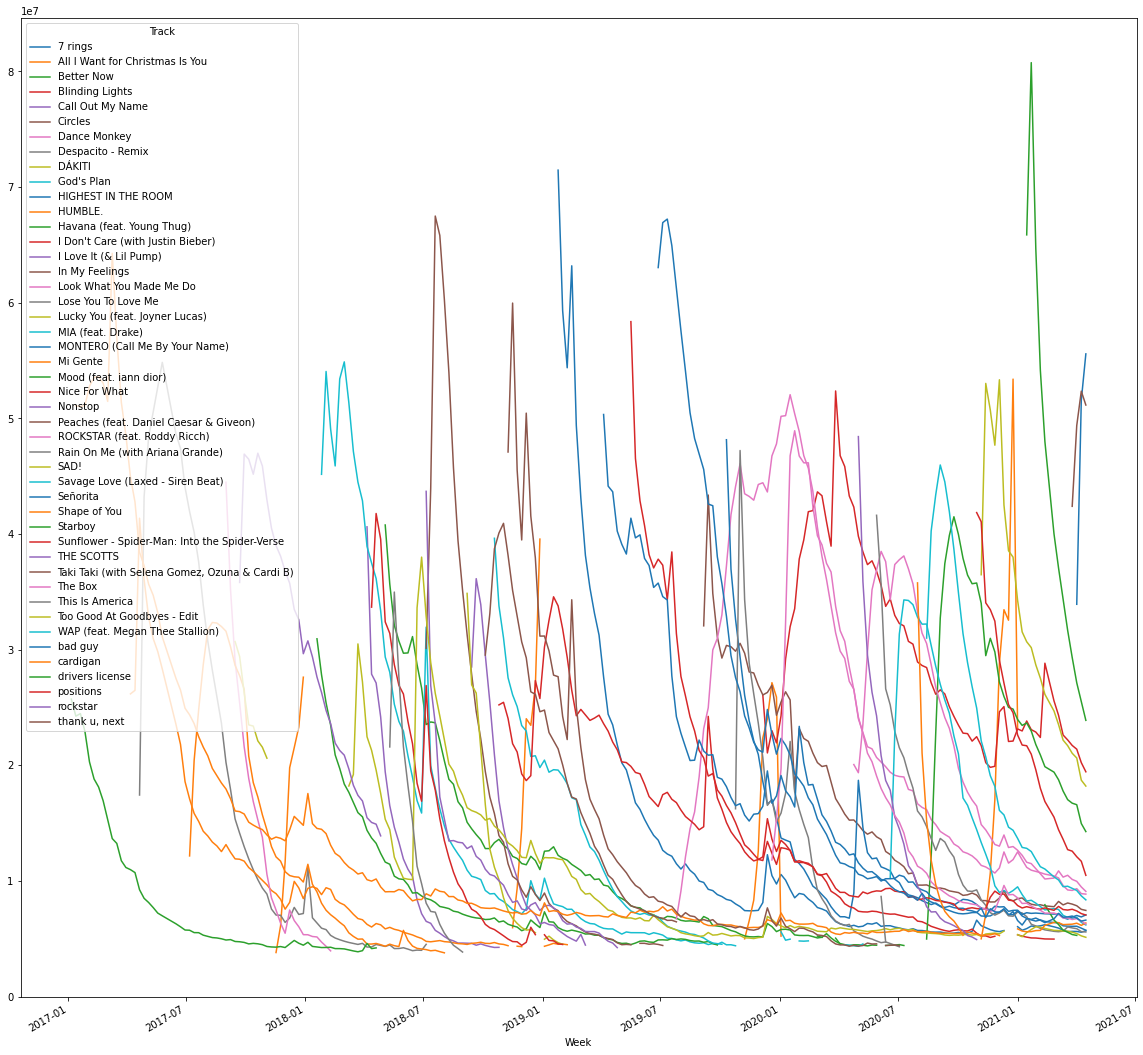

In [14]:
streams_by_song.plot(figsize=(20,20),kind='line')


Lets look at individual songs.

Most songs rise and then fall.  Check out streams of all I want for Christmas!


<AxesSubplot:xlabel='Week'>

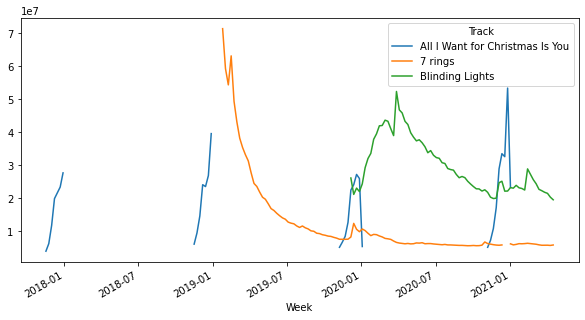

In [15]:
songs = ['All I Want for Christmas Is You','7 rings','Blinding Lights']
streams_by_song[songs].plot(figsize=(10,5),kind='line')

# Audio features of No. 1 songs

Next up:

get audio features for each of the tracks using the API
Get the list of ids from the links

make an API call with the correct credentials
Join it with the table.

First, we'll get the id of each track from the link, and add that to the dataframe

In [16]:
c['id'] = c['Link'].str[len('https://open.spotify.com/track/'):]
track_id=c[['id','Track','Streams']].loc[c['Rank'] == 1]
track_id.set_index('id', inplace=True)

track_id

,Track,Streams
id,,
5aAx2yezTd8zXrkmtKl66Z,Starboy,25734078
7qiZfU4dY1lWllzX7mPBI3,Shape of You,51095759
7qiZfU4dY1lWllzX7mPBI3,Shape of You,51021927
7qiZfU4dY1lWllzX7mPBI3,Shape of You,51124648
7qiZfU4dY1lWllzX7mPBI3,Shape of You,52796064
...,...,...
7lPN2DXiMsVn7XUKtOW1CS,drivers license,31682433
4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),42402124
4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),49387249


In [17]:
track_id = track_id.groupby('id').agg({'Track':'first', 'Streams':['sum','count']})

In [18]:
track_id.columns = track_id.columns.map('_'.join)
track_id = track_id.rename(columns={'Track_first':'Track', 'Streams_sum':'Streams','Streams_count':'OnChart'})

Now loop through only the ones that are part of the list

In [19]:
track_id.index

Index(['0TK2YIli7K1leLovkQiNik', '0VjIjW4GlUZAMYd2vXMi3b',
       '0b9oOr2ZgvyQu88wzixux9', '0bAkKNCQfWkexHFn7fIKns',
       '0bYg9bo50gSsH3LtXe2SQn', '0mel2N9Ws9r4yLQn5QE21Y',
       '0nbXyq5TXYPCO7pr3N8S4I', '0sf12qNH5qcw8qpgymFOqD',
       '116H0KvKr2Zl4RPuVBruDO', '14msK75pk3pA33pzPVNtBF',
       '1HfMVBKM75vxSfsQ5VefZ5', '1OmcAT5Y8eg5bUPv9qJT4R',
       '1cTZMwcBJT0Ka3UJPXOeeN', '1gm616Plq4ScqNi7TVkZ5N',
       '1rfofaqEpACxVEHIZBJe6W', '1rgnBhdG2JDFTbYkYRZAku',
       '1xQ6trAsedVPCdbtDAmk0c', '24ySl2hOPGCDcxBxFIqWBu',
       '2Fxmhks0bxGSBdJ92vM42m', '2G7V7zsVDxg1yRsu7Ew9RJ',
       '2Vx8E3K5icPZR7OCklWBXX', '2XW4DbS6NddZxRPm5rMCeY',
       '2rPE9A1vEgShuZxxzR2tZH', '2rb5MvYT7ZIxbKW5hfcHx8',
       '35mvY5S1H3J2QZyna3TFe0', '39Yp9wwQiSRIDOvrVg7mbk',
       '3HVWdVOQ0ZA45FuZGSfvns', '3KkXRkHbMCARz0aVfEt68P',
       '3ee8Jmje8o58CHK66QrVC2', '3eekarcy7kvN4yt5ZFzltW',
       '3tjFYV6RSFtuktYl3ZtYcq', '47EiUVwUp4C9fGccaPuUCS',
       '4MzXwWMhyBbmu6hOcLVD49', '4Oun2ylbjFKMPTiaSbbCih

In [23]:
id_list = ",".join(track_id.index)
id_list

'0TK2YIli7K1leLovkQiNik,0VjIjW4GlUZAMYd2vXMi3b,0b9oOr2ZgvyQu88wzixux9,0bAkKNCQfWkexHFn7fIKns,0bYg9bo50gSsH3LtXe2SQn,0mel2N9Ws9r4yLQn5QE21Y,0nbXyq5TXYPCO7pr3N8S4I,0sf12qNH5qcw8qpgymFOqD,116H0KvKr2Zl4RPuVBruDO,14msK75pk3pA33pzPVNtBF,1HfMVBKM75vxSfsQ5VefZ5,1OmcAT5Y8eg5bUPv9qJT4R,1cTZMwcBJT0Ka3UJPXOeeN,1gm616Plq4ScqNi7TVkZ5N,1rfofaqEpACxVEHIZBJe6W,1rgnBhdG2JDFTbYkYRZAku,1xQ6trAsedVPCdbtDAmk0c,24ySl2hOPGCDcxBxFIqWBu,2Fxmhks0bxGSBdJ92vM42m,2G7V7zsVDxg1yRsu7Ew9RJ,2Vx8E3K5icPZR7OCklWBXX,2XW4DbS6NddZxRPm5rMCeY,2rPE9A1vEgShuZxxzR2tZH,2rb5MvYT7ZIxbKW5hfcHx8,35mvY5S1H3J2QZyna3TFe0,39Yp9wwQiSRIDOvrVg7mbk,3HVWdVOQ0ZA45FuZGSfvns,3KkXRkHbMCARz0aVfEt68P,3ee8Jmje8o58CHK66QrVC2,3eekarcy7kvN4yt5ZFzltW,3tjFYV6RSFtuktYl3ZtYcq,47EiUVwUp4C9fGccaPuUCS,4MzXwWMhyBbmu6hOcLVD49,4Oun2ylbjFKMPTiaSbbCih,4R2kfaDFhslZEMJqAFNpdd,4S8d14HvHb70ImctNgVzQQ,4iJyoBOLtHqaGxP12qzhQI,4w8niZpiMy6qz1mntFA5uM,51MMC5DogGZAnHil5HQAXg,5CtI0qwDJkDQGwXD1H1cLb,5aAx2yezTd8zXrkmtKl66Z,60SdxE8apGAxMiRrpbmLY0,67BtfxlNbhBmCDR2L2l8qd,6ocbgoVGwY

Lets get the features of songs using the api

https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features


curl -X "GET" "https://api.spotify.com/v1/audio-features?ids=4JpKVNYnVcJ8tuMKjAj50A%2C2NRANZE9UCmPAS5XVbXL40%2C24JygzOLM0EmRQeGtFcIcG" -H "Accept: application/json" -H "Content-Type: application/json" -H "Authorization: Bearer XXX"


In [94]:
import requests
import json

url = "https://api.spotify.com/v1/audio-features?ids="+id_list

response = requests.get(url, headers={'Content-Type': 'application/json',
    'Authorization': 'Bearer XXXXX'})
response

<Response [200]>

In [95]:
info = response.text
features = json.loads(info)
features['audio_features'][0]

{'danceability': 0.681,
 'energy': 0.594,
 'key': 7,
 'loudness': -7.028,
 'mode': 1,
 'speechiness': 0.282,
 'acousticness': 0.165,
 'instrumentalness': 3.49e-06,
 'liveness': 0.134,
 'valence': 0.535,
 'tempo': 186.054,
 'type': 'audio_features',
 'id': '5aAx2yezTd8zXrkmtKl66Z',
 'uri': 'spotify:track:5aAx2yezTd8zXrkmtKl66Z',
 'track_href': 'https://api.spotify.com/v1/tracks/5aAx2yezTd8zXrkmtKl66Z',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5aAx2yezTd8zXrkmtKl66Z',
 'duration_ms': 230453,
 'time_signature': 4}

In [96]:
import json

# load from file if we can't use the API
with open('../datasets/spotify/no1_features.json', 'w') as f:
    json.dump(features, f)

In [20]:
#from file
import json

with open('../datasets/spotify/no1_features.json', 'r') as file:
    features = json.load(file)
features['audio_features'][0]

{'danceability': 0.681,
 'energy': 0.594,
 'key': 7,
 'loudness': -7.028,
 'mode': 1,
 'speechiness': 0.282,
 'acousticness': 0.165,
 'instrumentalness': 3.49e-06,
 'liveness': 0.134,
 'valence': 0.535,
 'tempo': 186.054,
 'type': 'audio_features',
 'id': '5aAx2yezTd8zXrkmtKl66Z',
 'uri': 'spotify:track:5aAx2yezTd8zXrkmtKl66Z',
 'track_href': 'https://api.spotify.com/v1/tracks/5aAx2yezTd8zXrkmtKl66Z',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5aAx2yezTd8zXrkmtKl66Z',
 'duration_ms': 230453,
 'time_signature': 4}

In [21]:
features_df = pd.DataFrame.from_dict(features['audio_features'])
features_df.set_index('id', inplace=True)
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 5aAx2yezTd8zXrkmtKl66Z to 67BtfxlNbhBmCDR2L2l8qd
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      46 non-null     float64
 1   energy            46 non-null     float64
 2   key               46 non-null     int64  
 3   loudness          46 non-null     float64
 4   mode              46 non-null     int64  
 5   speechiness       46 non-null     float64
 6   acousticness      46 non-null     float64
 7   instrumentalness  46 non-null     float64
 8   liveness          46 non-null     float64
 9   valence           46 non-null     float64
 10  tempo             46 non-null     float64
 11  type              46 non-null     object 
 12  uri               46 non-null     object 
 13  track_href        46 non-null     object 
 14  analysis_url      46 non-null     object 
 15  duration_ms       46 non-null     int64  
 16  time_signa

join track_id with features

In [22]:
track_features = track_id.join(features_df)
track_features.head()

,Track,Streams,OnChart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,,,,
0TK2YIli7K1leLovkQiNik,Señorita,323383320,5,0.759,0.540,9.0,-6.039,0.0,0.0287,0.03700,0.0000,0.0945,0.750,116.947,audio_features,spotify:track:0TK2YIli7K1leLovkQiNik,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,https://api.spotify.com/v1/audio-analysis/0TK2...,190960.0,4.0
0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,378552988,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0b9oOr2ZgvyQu88wzixux9,This Is America,34989790,1,0.854,0.463,5.0,-6.159,1.0,0.1370,0.11700,0.0000,0.3540,0.549,120.024,audio_features,spotify:track:0b9oOr2ZgvyQu88wzixux9,https://api.spotify.com/v1/tracks/0b9oOr2ZgvyQ...,https://api.spotify.com/v1/audio-analysis/0b9o...,225773.0,4.0
0bAkKNCQfWkexHFn7fIKns,In My Feelings,111450513,2,0.735,0.482,8.0,-9.445,1.0,0.1390,0.00623,0.0144,0.4480,0.315,181.995,audio_features,spotify:track:0bAkKNCQfWkexHFn7fIKns,https://api.spotify.com/v1/tracks/0bAkKNCQfWke...,https://api.spotify.com/v1/audio-analysis/0bAk...,217933.0,4.0
0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,92968491,2,0.336,0.627,7.0,-7.463,1.0,0.0384,0.16400,0.0000,0.0708,0.350,150.273,audio_features,spotify:track:0bYg9bo50gSsH3LtXe2SQn,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,https://api.spotify.com/v1/audio-analysis/0bYg...,241107.0,4.0


Bar chart of how long on the charts, number of streams

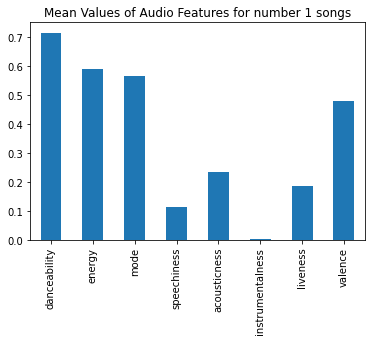

In [23]:
import matplotlib.pyplot as plt
audio_features = ['danceability', 'energy', 'mode',
       'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence']
track_features[audio_features].mean().plot.bar()
plt.title('Mean Values of Audio Features for number 1 songs')
plt.show()

In [ ]:
import seaborn as sns
print("Mean value for Streams:", track_features['Streams'].mean())
sns.histplot(track_features['Streams'])
plt.show()

In [ ]:
print("Mean value for On the chart:", track_features['OnChart'].mean())
sns.histplot(track_features['OnChart'])
plt.show()

Mean value for danceability: 0.7155000000000001


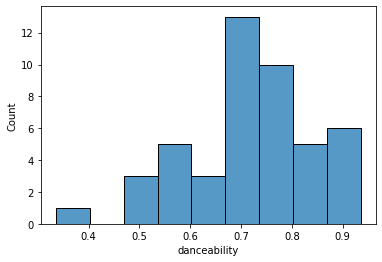

In [44]:
print("Mean value for danceability:", track_features['danceability'].mean())
sns.histplot(track_features['danceability'])
plt.show()

Mean value for energy: 0.5906956521739131


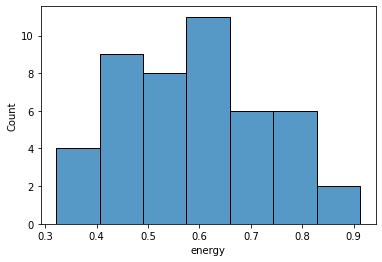

In [45]:
print("Mean value for energy:", track_features['energy'].mean())
sns.histplot(track_features['energy'])
plt.show()

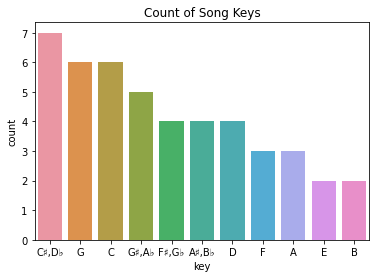

In [46]:
#map the numeric values of key to notes
key_mapping = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
track_features['key'] = track_features['key'].map(key_mapping)

sns.countplot(x = 'key', data=track_features, order=track_features['key'].value_counts().index)
plt.title("Count of Song Keys")
plt.show()

Mean value for loudness: -6.620760869565219
/Users/mike/.virtualenvs/notebooks/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


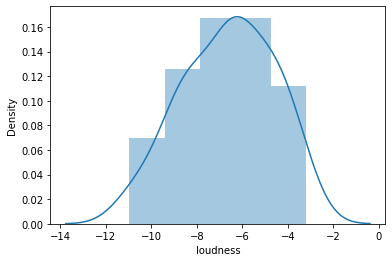

In [47]:
print("Mean value for loudness:", track_features['loudness'].mean())
sns.displot(track_features['loudness'])
plt.show()

Mean value for mode feature: 0.5652173913043478


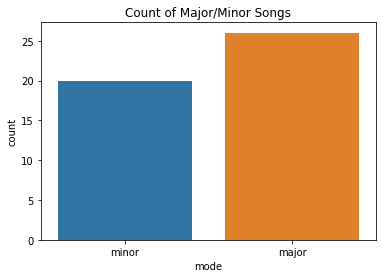

In [48]:
#print mean value for mode
print("Mean value for mode feature:", track_features['mode'].mean())

#map the binary value of mode to major/minor
mode_mapping = {1.0: "major", 0.0: "minor"}
track_features['mode'] = track_features['mode'].map(mode_mapping)

#draw a countplot of the values
sns.countplot(x = 'mode', data=track_features)
plt.title("Count of Major/Minor Songs")
plt.show()

Mean value for speechiness: 0.11393478260869565


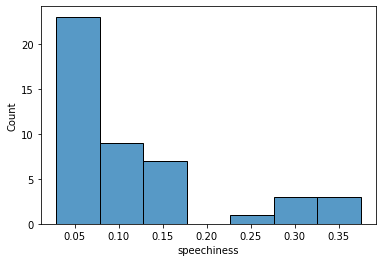

In [51]:
#mean value and distplot for speechiness feature
print("Mean value for speechiness:", track_features['speechiness'].mean())
sns.histplot(track_features['speechiness'])
plt.show()

In [ ]:
print("Mean value for acousticness:", track_features['acousticness'].mean())
sns.histplot(track_features['acousticness'])
plt.show()

In [ ]:
print("Mean value for instrumentalness:", track_features['instrumentalness'].mean())
sns.histplot(track_features['instrumentalness'])
plt.show()

In [ ]:
print("Mean value for liveness:", track_features['liveness'].mean())
sns.histplot(track_features['liveness'])
plt.show()

In [ ]:
print("Mean value for valence:", track_features['valence'].mean())
sns.histplot(track_features['valence'])
plt.show()

Mean value for tempo: 119.80167391304347


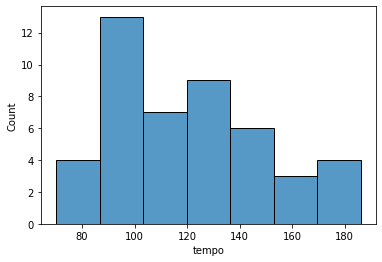

In [57]:
print("Mean value for tempo:", track_features['tempo'].mean())
sns.histplot(track_features['tempo'])
plt.show()

In [ ]:
print("Mean value for duration:", track_features['duration_ms'].mean())
sns.histplot(track_features['duration_ms'], binwidth=3)
plt.show()

Mean value for time_signature feature: 3.9782608695652173


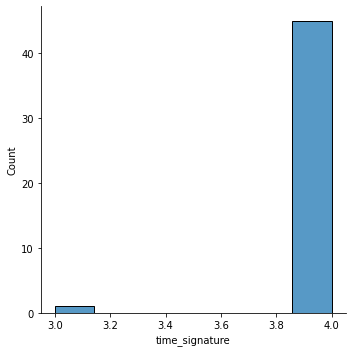

In [61]:
#mean value and distplot for time_signature feature
print('Mean value for time_signature feature:', track_features['time_signature'].mean())
sns.displot(track_features['time_signature'])
plt.show()

Basically all the songs in the playlist are 4/4.
Conclusion: People really like songs that are 4/4? (I wonder if we subconsciously notice this or something.)

In [56]:
col = ['danceability', 'energy', 'loudness', 
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Streams', 'OnChart']
corrMatrix = track_features.loc[:,col].corr()
corrMatrix

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Streams,OnChart
danceability,1.000000,-0.071773,0.041378,0.400534,-0.183121,-0.002219,0.068120,0.295382,-0.128693,0.123300,0.126310
energy,-0.071773,1.000000,0.715044,-0.150926,-0.270835,-0.194416,-0.149364,0.413673,0.003046,0.039003,0.081377
loudness,0.041378,0.715044,1.000000,-0.308789,-0.189855,-0.346310,-0.152883,0.441010,-0.053568,0.055316,0.083180
speechiness,0.400534,-0.150926,-0.308789,1.000000,-0.125242,0.411470,-0.118808,0.005464,0.112172,0.007163,0.028867
acousticness,-0.183121,-0.270835,-0.189855,-0.125242,1.000000,0.039175,-0.168974,0.079054,-0.220354,0.331736,0.312086
instrumentalness,-0.002219,-0.194416,-0.346310,0.411470,0.039175,1.000000,-0.067904,0.040113,0.112736,0.061568,0.074771
liveness,0.068120,-0.149364,-0.152883,-0.118808,-0.168974,-0.067904,1.000000,-0.003374,0.029975,-0.101180,-0.118459
valence,0.295382,0.413673,0.441010,0.005464,0.079054,0.040113,-0.003374,1.000000,-0.085550,0.199375,0.199688
tempo,-0.128693,0.003046,-0.053568,0.112172,-0.220354,0.112736,0.029975,-0.085550,1.000000,-0.286456,-0.296061
Streams,0.123300,0.039003,0.055316,0.007163,0.331736,0.061568,-0.101180,0.199375,-0.286456,1.000000,0.983930


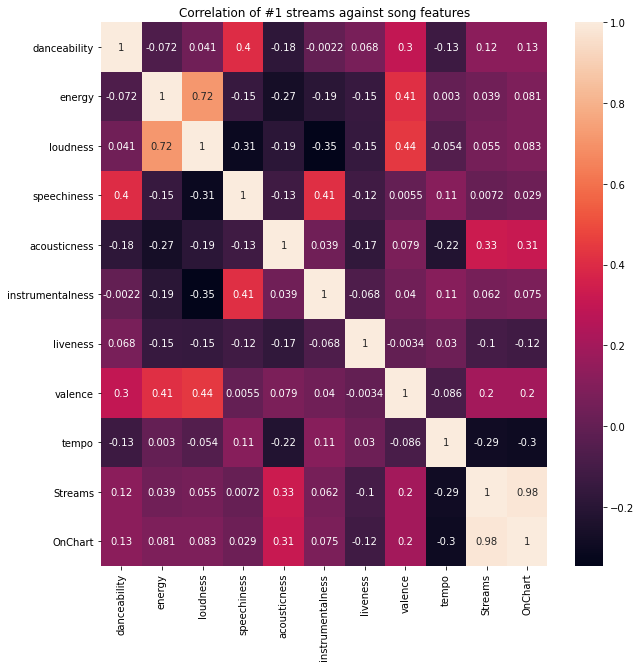

In [59]:
import seaborn as sns #data visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation of #1 streams against song features")
plt.show()

It looks like there might be some relationship between number of streams and acousticness, but it is not significant.

- Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
- Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
- Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
- Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
- Energy: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
- Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
- Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

What other questions can we ask about the chart data?

e.g.
https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de

